<a href="https://colab.research.google.com/github/akfalah/03_AhmadKhoirulFalah/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# @title mount to drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [44]:
# @title import library

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# @title fungsi dilasi tanpa method morphology dari library openCV

def dilate(image, se):
    # mengambil dimensi gambar
    height, width = image.shape

    # mengambil dimensi SE
    se_height, se_width = se.shape

    # Menghitung offset berdasarkan ukuran SE
    offset_y = se_height // 2
    offset_x = se_width // 2

    # membuat gambar untuk hasil dilasi
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(offset_y, height - offset_y):
        for x in range(offset_x, width - offset_x):
            # membuat area seukuran SE dari gambar
            region = image[y - offset_y:y + offset_y + 1, x - offset_x:x + offset_x + 1]

            # menghitung nilai maksimum di region dengan struktur elemen
            dilated_image[y, x] = np.max(region * se)

    return dilated_image


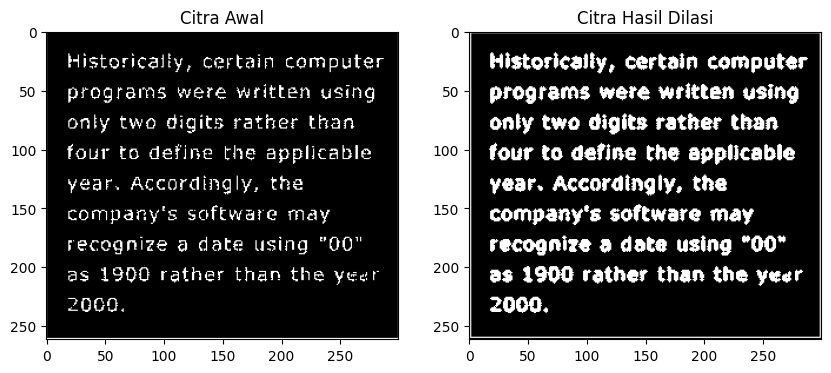

In [46]:
# @title implementasi dilasi tanpa menggunakan method morphology dari library openCV

image = cv.imread('/content/drive/MyDrive/pcvk/Images/morphology.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# membuat SE cross 3x3
se = np.array(
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    dtype=np.uint8
)

# memanggil fungsi dilasi
dilated_image = dilate(binary_image, se)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()


[[0 1 0]
 [1 1 1]
 [0 1 0]]


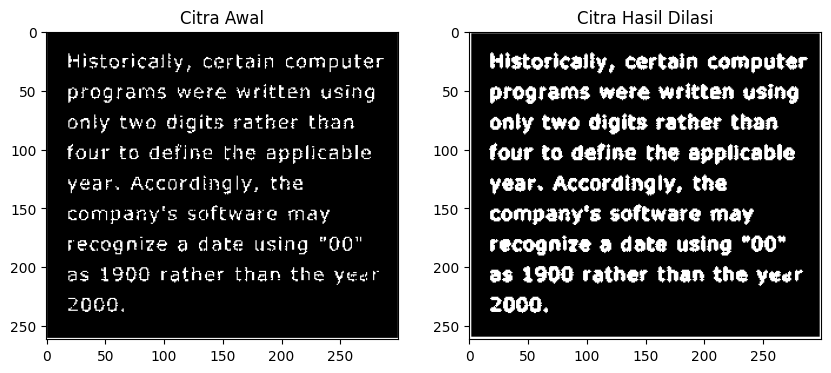

In [47]:
# @title implementasi dilasi menggunakan method morphology dari library openCV

image = cv.imread('/content/drive/MyDrive/pcvk/Images/morphology.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# Membuat SE cross 3x3
se = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

# menampilkan SE cross 3x3 yang telah dibuat
print(se)

# melakukan dilasi menggunakan method dilate openCV
dilated_image = cv.dilate(binary_image, se, iterations = 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()


In [48]:
# @title fungsi erosi tanpa method morphology dari library openCV

def erode(image, se):
    # mengambil dimensi gambar
    height, width = image.shape

    # mengambil dimensi SE
    se_height, se_width = se.shape

    # Menghitung offset berdasarkan ukuran SE
    offset_y = se_height // 2
    offset_x = se_width // 2

    # membuat gambar untuk hasil dilasi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(offset_y, height - offset_y):
        for x in range(offset_x, width - offset_x):
            # membuat area seukuran SE dari gambar
            region = image[y - offset_y:y + offset_y + 1, x - offset_x:x + offset_x + 1]

            # menghitung nilai minimum di region dengan struktur elemen
            eroded_image[y, x] = np.min(region * se)

    return eroded_image


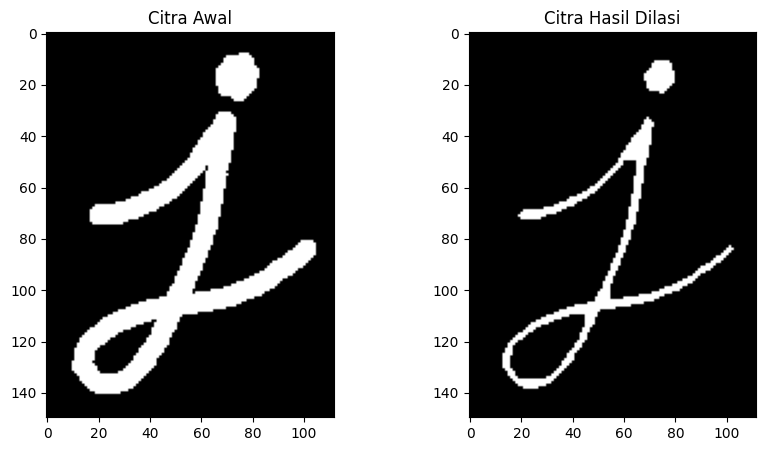

In [49]:
# @title implementasi erosi tanpa menggunakan method morphology dari library openCV

image = cv.imread('/content/drive/MyDrive/pcvk/Images/j.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# Membuat SE square 5x5
se = np.ones((5, 5), dtype=np.uint8)

# memanggil fungsi erosi
eroded_image = erode(binary_image, se)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


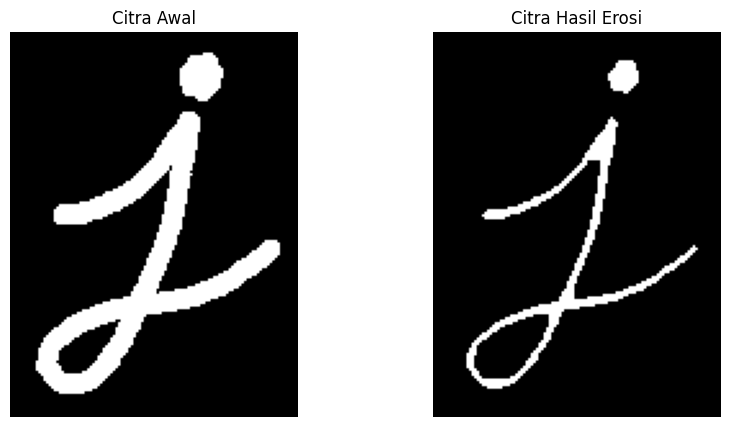

In [50]:
# @title implementasi erosi menggunakan method morphology dari library openCV

image = cv.imread('/content/drive/MyDrive/pcvk/Images/j.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# Membuat SE square 5x5
se = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

# menampilkan SE square 5x5 yang telah dibuat
print(se)

# melakukan erosi menggunakan method dilate openCV
eroded_image = cv.erode(binary_image, se, iterations = 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


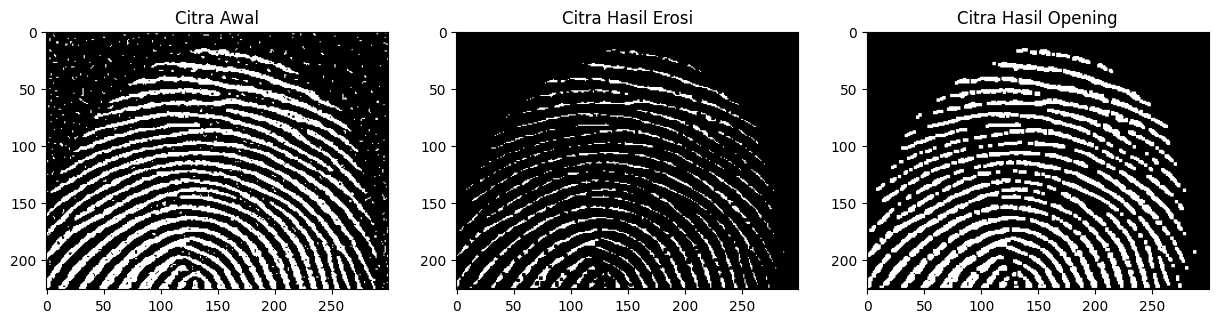

In [51]:
# @title implentasi opening tanpa menggunakan method morphology dari library openCV

image = cv.imread('/content/drive/MyDrive/pcvk/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# Membuat SE square 3x3
se = np.ones((3, 3), dtype=np.uint8)

# memanggil fungsi erosi
eroded_image = erode(binary_image, se)

# memanggil fungsi dilasi
dilated_image = dilate(eroded_image, se)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()


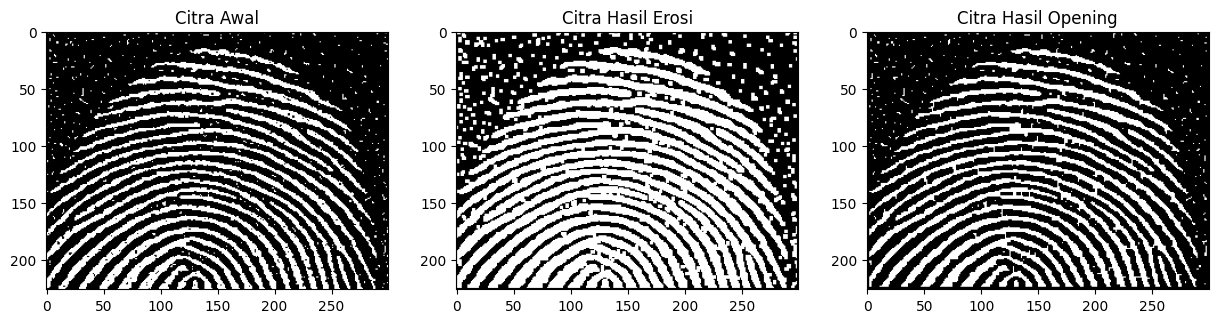

In [52]:
# @title implentasi closing tanpa menggunakan method morphology dari library openCV

image = cv.imread('/content/drive/MyDrive/pcvk/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# Membuat SE square 3x3
se = np.ones((3, 3), dtype=np.uint8)

# memanggil fungsi dilasi
dilated_image = dilate(binary_image, se)

# memanggil fungsi erosi
eroded_image = erode(dilated_image, se)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')

plt.subplot(1, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()


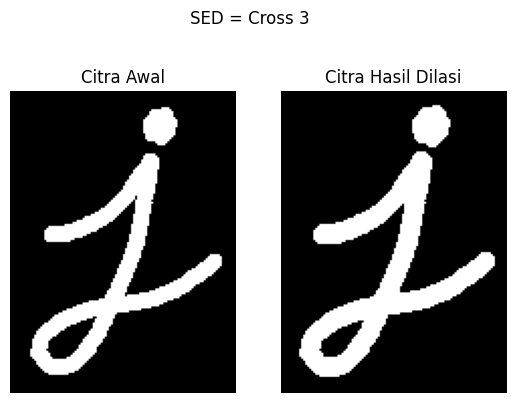

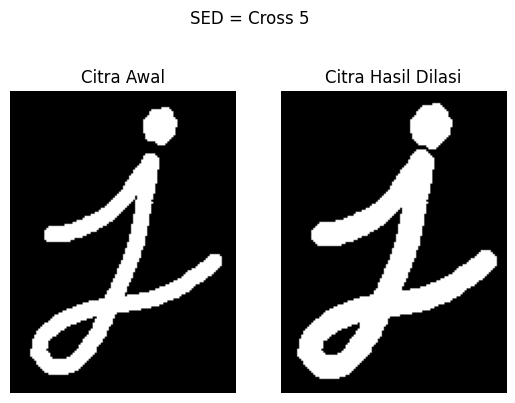

In [63]:
# @title implentasi dilasi 3x3 & 5x5

def se_cross(size):
    se = np.zeros((size, size), dtype=np.uint8)

    # mengambil garis tengah vertikal
    se[:, size // 2] = 1

    # mengambil garis tengah horizontal
    se[size // 2, :] = 1

    return se

image = cv.imread('/content/drive/MyDrive/pcvk/Images/j.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# membuat SE cross 3x3
cross_3 = se_cross(3)

# membuat SE cross 5x5
cross_5 = se_cross(5)

# memanggil fungsi dilasi
dilated_image_3 = dilate(binary_image, cross_3)
dilated_image_5 = dilate(binary_image, cross_5)

plt.suptitle('SED = Cross 3')

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image_3, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

plt.suptitle('SED = Cross 5')

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image_5, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()


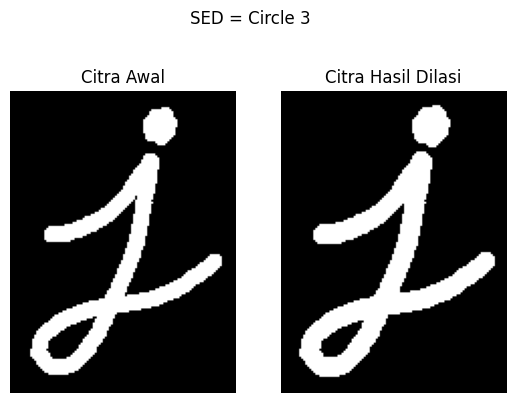

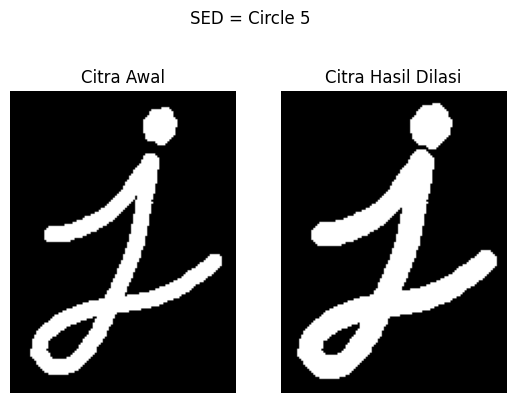

In [65]:
# @title implentasi dilasi circular 3x3 & 5x5

def se_circular(size):
    # membuat array nol berukuran size x size
    se = np.zeros((size, size), dtype=np.uint8)

    # Menghitung jari-jari
    radius = size // 2

    for y in range(size):
        for x in range(size):
            # Menghitung jarak dari pusat
            center = np.sqrt((x - radius) ** 2 + (y - radius) ** 2)

            # Jika jarak kurang dari atau sama dengan radius, set nilai menjadi 1
            if center <= radius:
                se[y, x] = 1

    return se

image = cv.imread('/content/drive/MyDrive/pcvk/Images/j.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# membuat SE circular 3x3
circular_3 = se_circular(3)

# membuat SE circular 5x5
circular_5 = se_circular(5)

# memanggil fungsi dilasi
dilated_image_3 = dilate(binary_image, circular_3)
dilated_image_5 = dilate(binary_image, circular_5)

plt.suptitle('SED = Circle 3')

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image_3, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

plt.suptitle('SED = Circle 5')

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image_5, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()


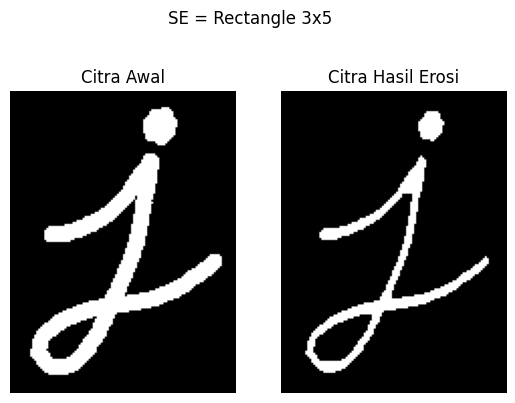

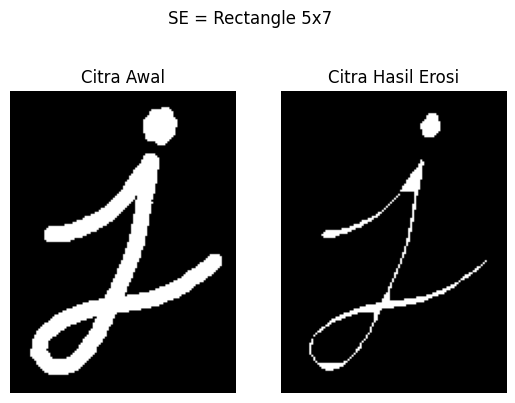

In [66]:
# @title implementasi erosi rectangle 3x5 & 5x7

image = cv.imread('/content/drive/MyDrive/pcvk/Images/j.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# membuat SE rectangle 3x5
rectangle_3x5 = np.ones((3, 5), dtype=np.uint8)

# membuat SE rectangle 5x7
rectangle_5x7 = np.ones((5, 7), dtype=np.uint8)

eroded_image_3x5 = erode(binary_image, rectangle_3x5)
eroded_image_5x7 = erode(binary_image, rectangle_5x7)

plt.suptitle('SE = Rectangle 3x5')

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image_3x5, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

plt.suptitle('SE = Rectangle 5x7')

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image_5x7, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


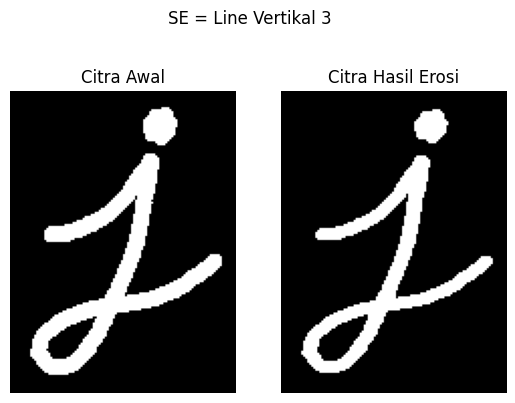

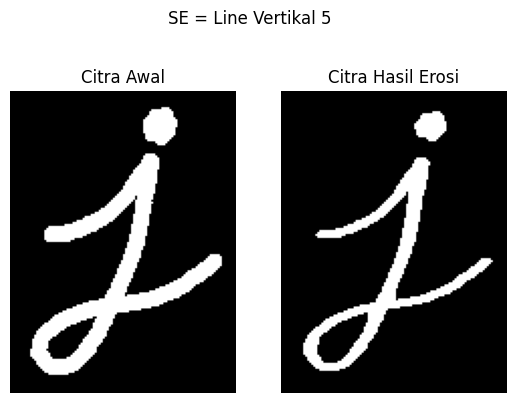

In [79]:
# @title implementasi erosi line vertikal 3 & 5

image = cv.imread('/content/drive/MyDrive/pcvk/Images/j.png', cv.IMREAD_GRAYSCALE)

# mengubah gambar menjadi biner dengan threshold 128 (skala keabuan)
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# membuat SE line vertikal 3
vertikal_3 = np.ones((3, 1), dtype=np.uint8)

# membuat SE line vertikal 5
vertikal_5 = np.ones((5, 1), dtype=np.uint8)

eroded_image_3 = erode(binary_image, vertikal_3)
eroded_image_5 = erode(binary_image, vertikal_5)

plt.suptitle('SE = Line Vertikal 3')

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image_3, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

plt.suptitle('SE = Line Vertikal 5')

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_image_5, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()
